## Project – Credit Card Fraud Detection

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Tasks to be performed:

1. Load the dataset using the pandas module.


In [22]:
from collections import Counter
import itertools
# Load the csv file
dataframe = pd.read_csv(r"creditcard.csv.crdownload")
dataframe.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


2. Perform missing value analysis on the dataset.

In [23]:
dataframe.isnull().values.any()

True

In [24]:
dataframe=dataframe.fillna(method='ffill')

In [25]:
dataframe["Amount"].describe()

count    11665.000000
mean        62.790606
std        179.809739
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [26]:
dataframe.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

3. From the dataset, calculate the number of genuine transactions, number of
fraud transactions and the percentage of fraud transactions.

In [27]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  11616
Number of Fraud transactions:  49
Percentage of Fraud transactions: 0.4201


4. Using the visualization module, visualize the genuine and fraudulent
transactions using a bar graph.

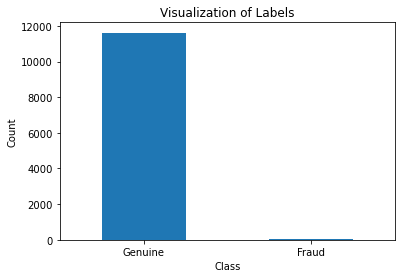

In [28]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

5. Using the Standard Scaler module, normalize the amount column and
store the new values in the NormalizedAmount column.

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

6. Split the dataset in train and test set and have a 70:30 split ratio for the
model.

In [30]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (8165, 29)
Shape of test_X:  (3500, 29)


7. Now use a decision tree and random forest model for training on top of the
train set.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
decision_tree = DecisionTreeClassifier()
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

8. Compare the predictions of both models using predict().

In [32]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.91428571428571
Decision Tree Score:  99.85714285714286


In [33]:
predictions_dt[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [34]:
predictions_rf[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

9. Compare the accuracy of both models using score().

In [35]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

10. Check the performance matrix of both models and compare which
model is having the highest performance.

In [36]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[3480    3]
 [   2   15]]


In [37]:
metrics(test_Y, predictions_dt)

Accuracy: 0.99857
Precision: 0.83333
Recall: 0.88235
F1-score: 0.85714


In [39]:
from sklearn.metrics import classification_report

print("Decision Tree Performance:")
print(classification_report(test_Y, predictions_dt))

print("Random Forest Performance:")
print(classification_report(test_Y, predictions_rf))


Decision Tree Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3483
         1.0       0.83      0.88      0.86        17

    accuracy                           1.00      3500
   macro avg       0.92      0.94      0.93      3500
weighted avg       1.00      1.00      1.00      3500

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3483
         1.0       0.94      0.88      0.91        17

    accuracy                           1.00      3500
   macro avg       0.97      0.94      0.95      3500
weighted avg       1.00      1.00      1.00      3500

